# EDA

--- 
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import matplotlib.colors as mcolors
from tabulate import tabulate


--- 
## Load Data

In [2]:
path = '../data/'
df = pd.read_csv(path+'refined_wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [3]:
# store variable names in a list for easier iteration
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',	'density', 'pH', 'sulphates', 'alcohol']

--- 
## Explore the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         985 non-null    float64
 1   volatile acidity      985 non-null    float64
 2   citric acid           985 non-null    float64
 3   residual sugar        985 non-null    float64
 4   chlorides             985 non-null    float64
 5   free sulfur dioxide   985 non-null    float64
 6   total sulfur dioxide  985 non-null    float64
 7   density               985 non-null    float64
 8   pH                    985 non-null    float64
 9   sulphates             985 non-null    float64
 10  alcohol               985 non-null    float64
 11  quality               985 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 92.5 KB


In [5]:
for var in variables:
    print(f"Number of unique values for {var}: {len(df[var].unique())}")

Number of unique values for fixed acidity: 71
Number of unique values for volatile acidity: 128
Number of unique values for citric acid: 69
Number of unique values for residual sugar: 37
Number of unique values for chlorides: 81
Number of unique values for free sulfur dioxide: 39
Number of unique values for total sulfur dioxide: 106
Number of unique values for density: 356
Number of unique values for pH: 67
Number of unique values for sulphates: 57
Number of unique values for alcohol: 52


# A Histogram for each Variable

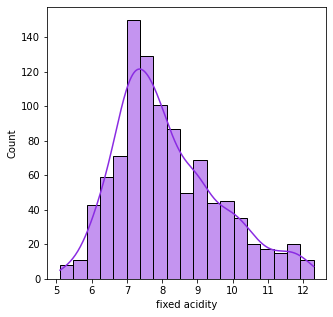

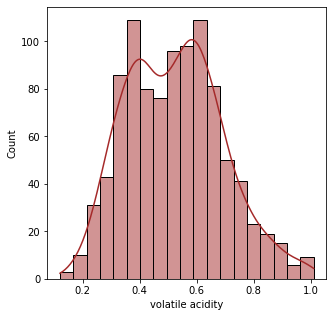

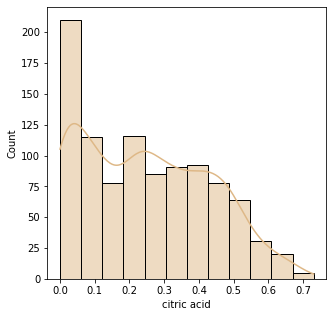

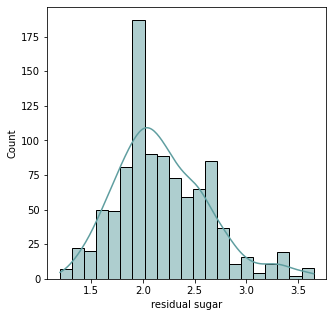

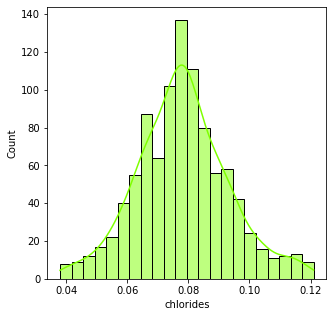

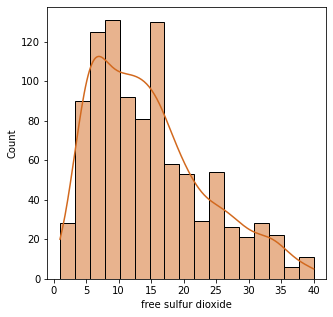

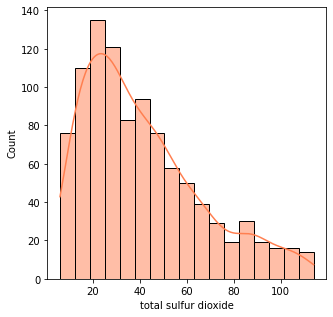

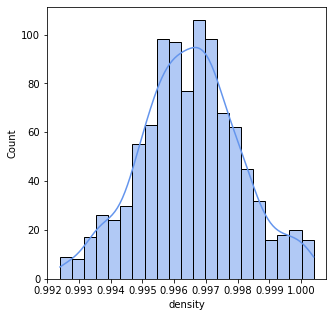

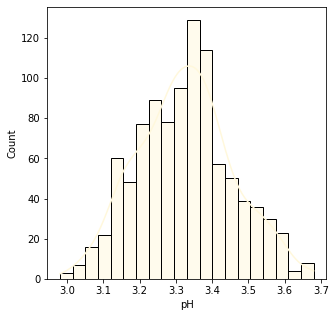

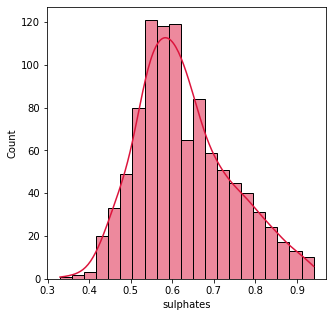

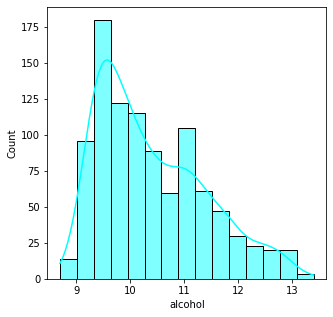

In [6]:
colors = list(mcolors.CSS4_COLORS.keys())[10:]
i = 0
for var in variables:
    f = plt.figure(figsize=(5, 5))
    sb.histplot(x=var, data=df, kde=True, color = colors[i])
    i += 1

# Finding which level has the highest frequency

In [19]:
col_names = ["Variable", "Largest Count"]
data = []
for var in variables:
    data.append([var, df[var].value_counts().nlargest(1)])

print(tabulate(data, headers=col_names))


Variable                Largest Count
--------------------  ---------------
fixed acidity                      42
volatile acidity                   29
citric acid                        87
residual sugar                    110
chlorides                          38
free sulfur dioxide                79
total sulfur dioxide               33
density                            23
pH                                 39
sulphates                          50
alcohol                            82


# Trying to find which variables help us predict the quality

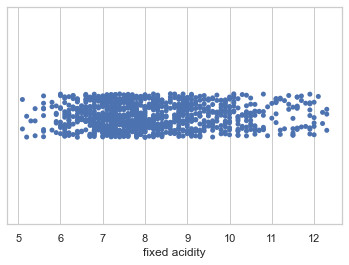

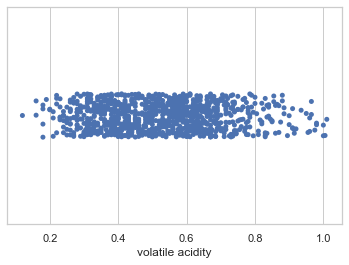

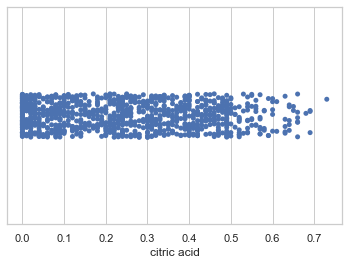

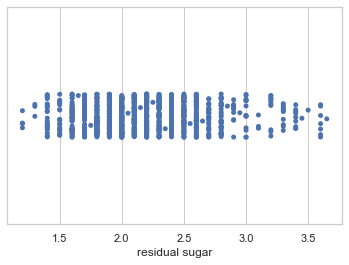

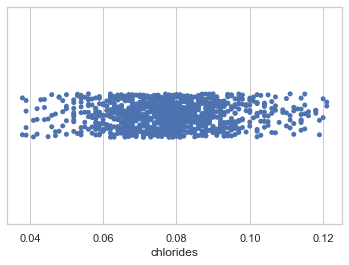

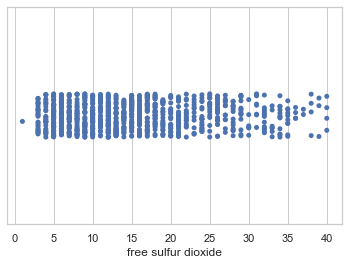

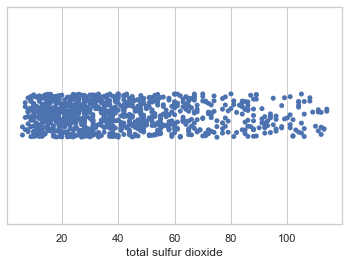

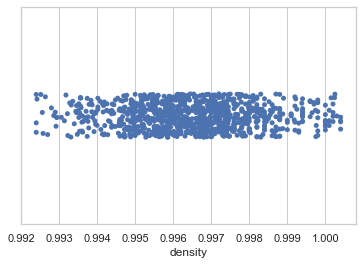

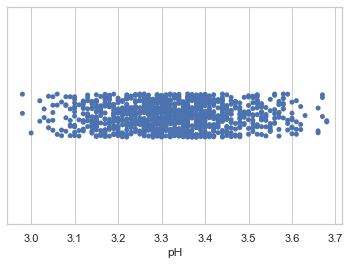

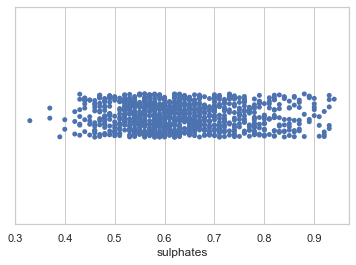

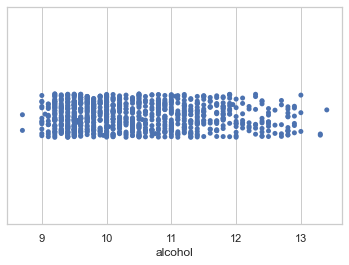

In [8]:
sb.set_theme(style="whitegrid")
sb.load_dataset

for var in variables:
    ax = sb.stripplot(x = df[var])
    plt.show()

# Trying to find correlation

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.288516,0.653996,0.228080,0.184628,-0.150600,-0.103047,0.594811,-0.699294,0.164897,-0.020864,0.121120
volatile acidity,-0.288516,1.000000,-0.625634,0.013343,0.124037,-0.008736,0.108616,0.044555,0.250983,-0.320766,-0.231145,-0.255681
citric acid,0.653996,-0.625634,1.000000,0.150388,0.051142,-0.081912,-0.007448,0.274774,-0.480568,0.278684,0.164969,0.205381
residual sugar,0.228080,0.013343,0.150388,1.000000,0.246455,0.078124,0.158926,0.381812,-0.068465,0.046317,0.103327,0.029141
chlorides,0.184628,0.124037,0.051142,0.246455,1.000000,0.031840,0.178405,0.413761,-0.174504,-0.102031,-0.305552,-0.146627
free sulfur dioxide,-0.150600,-0.008736,-0.081912,0.078124,0.031840,1.000000,0.626561,-0.010024,0.127138,0.104110,-0.037504,-0.070099
total sulfur dioxide,-0.103047,0.108616,-0.007448,0.158926,0.178405,0.626561,1.000000,0.146110,0.017320,-0.046874,-0.250690,-0.162144
density,0.594811,0.044555,0.274774,0.381812,0.413761,-0.010024,0.146110,1.000000,-0.238390,0.047893,-0.554258,-0.195761
pH,-0.699294,0.250983,-0.480568,-0.068465,-0.174504,0.127138,0.017320,-0.238390,1.000000,0.003509,0.105050,-0.081253
sulphates,0.164897,-0.320766,0.278684,0.046317,-0.102031,0.104110,-0.046874,0.047893,0.003509,1.000000,0.293107,0.349901


<AxesSubplot:>

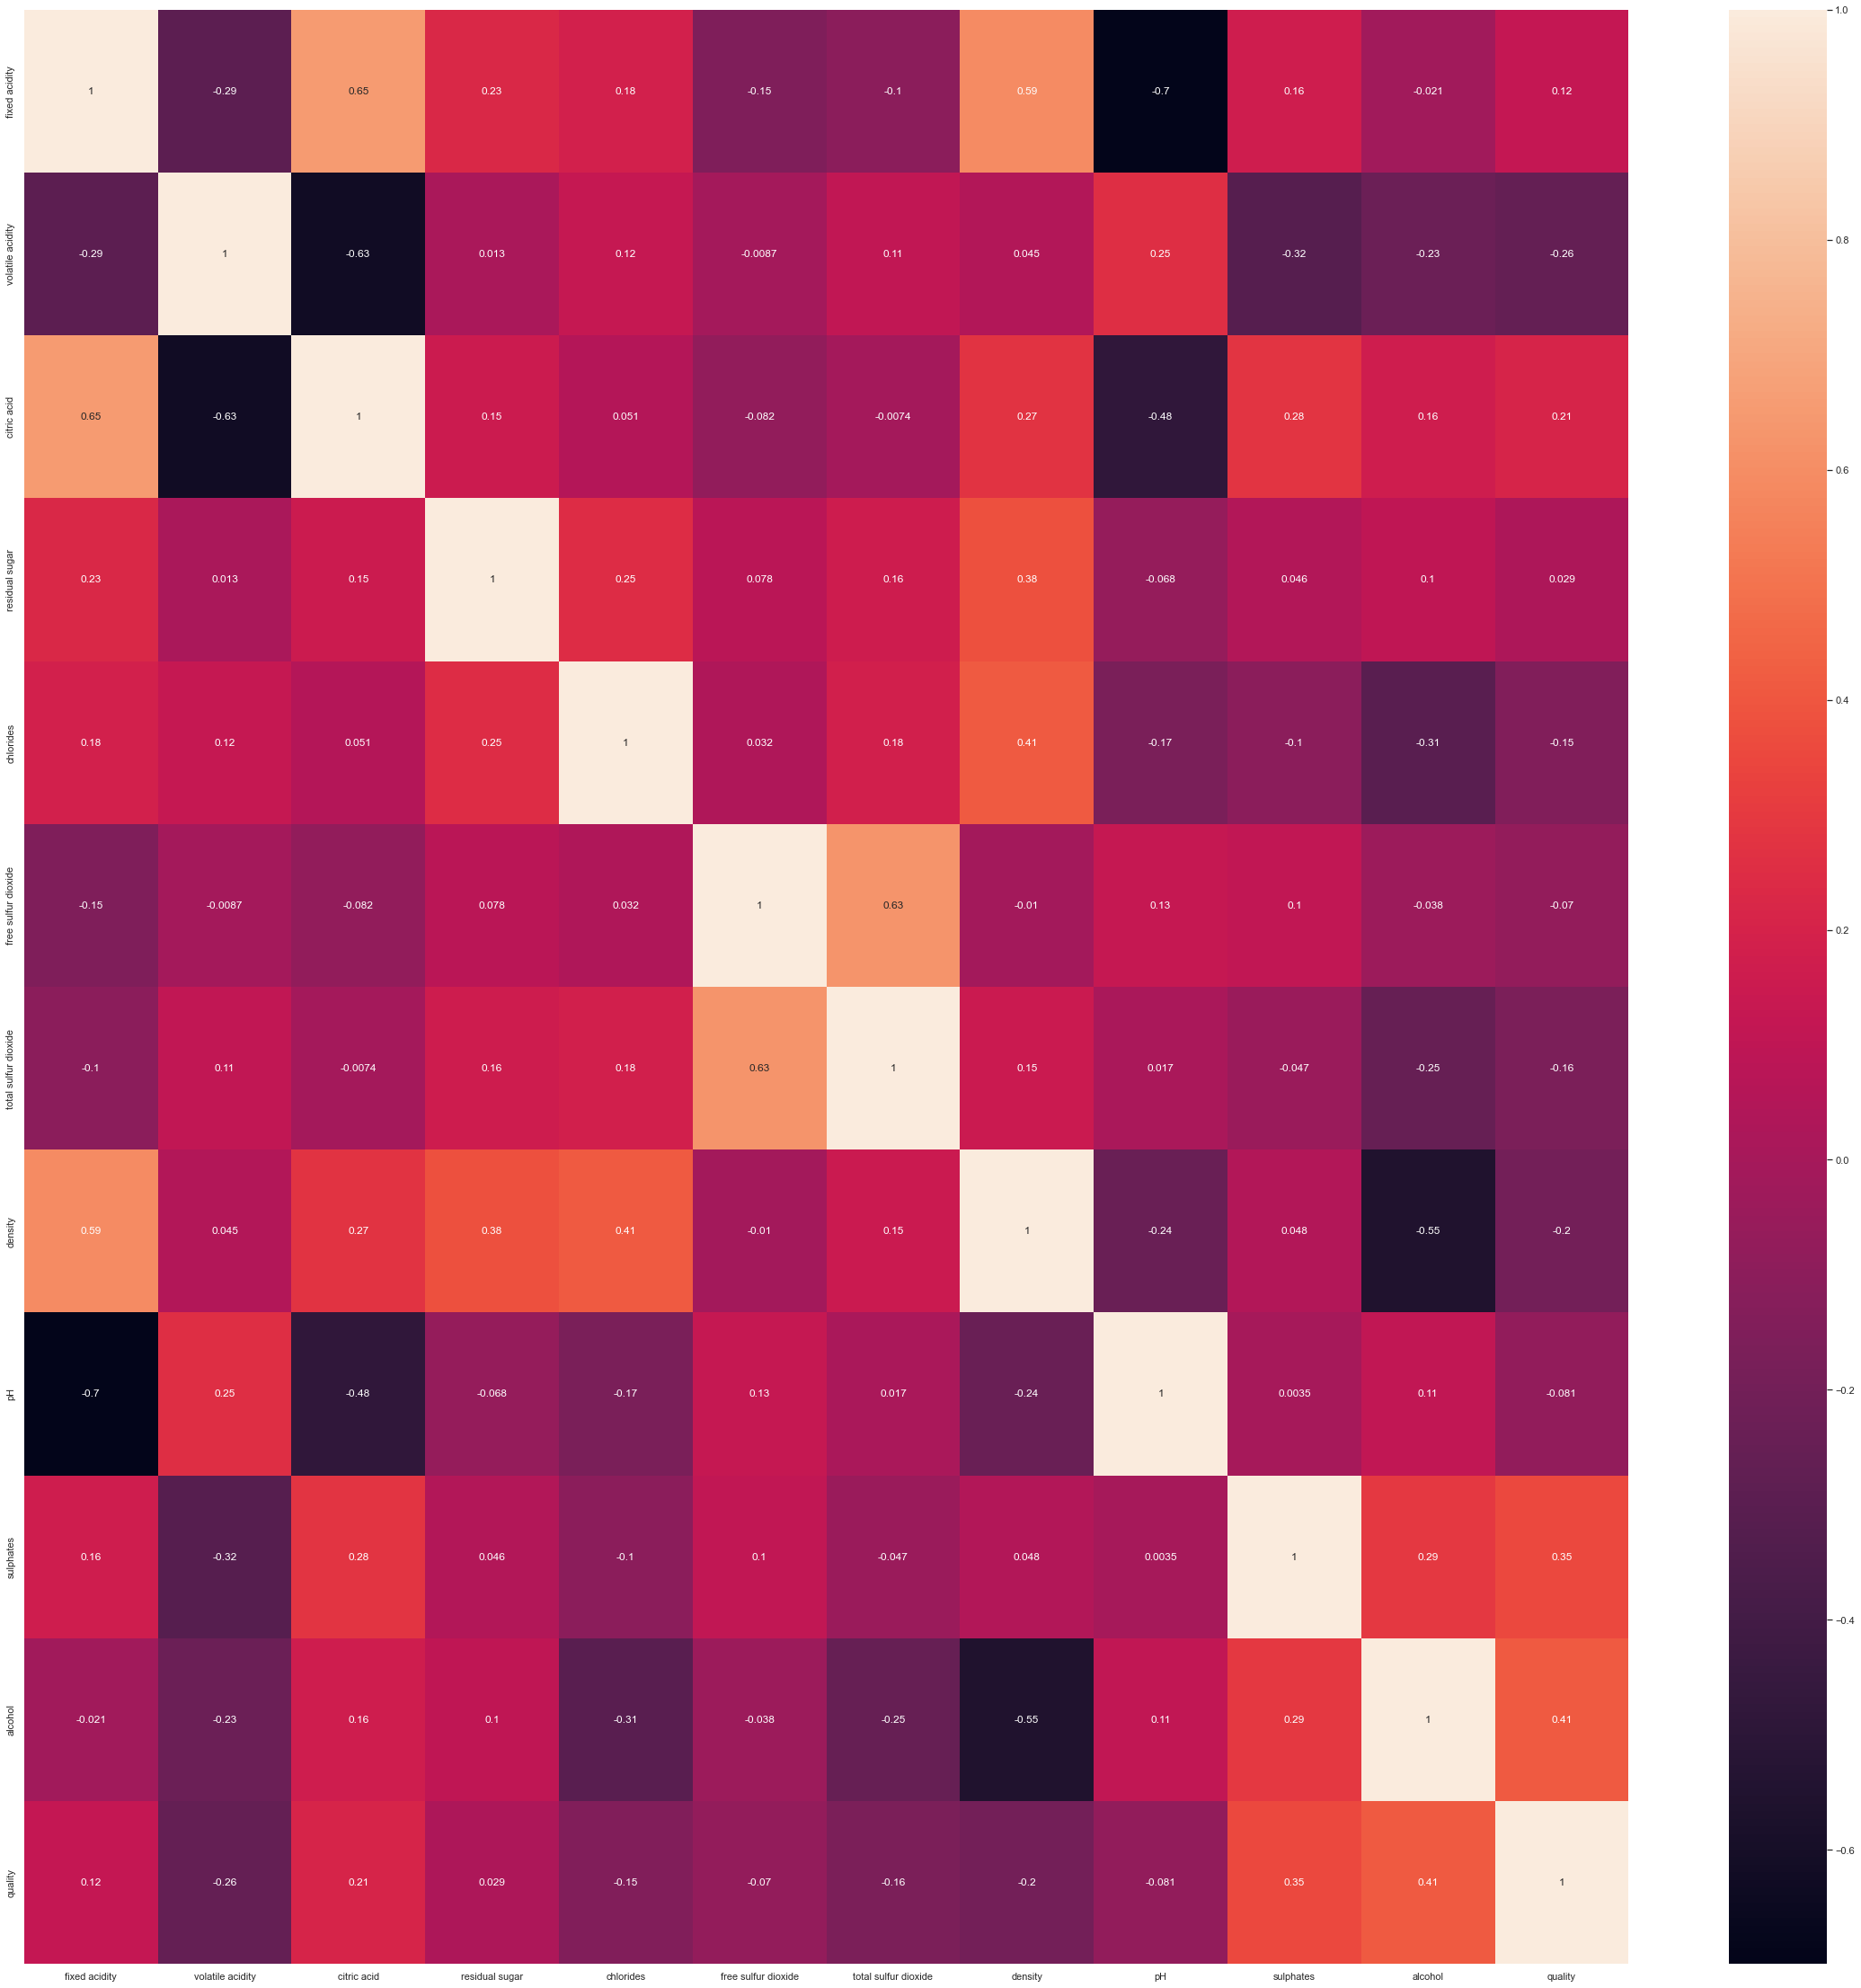

In [10]:
fig=plt.figure(figsize=(40,40))
sb.heatmap(data=df.corr(), annot=True,)

# Performing Point Biserral Correlation

In [15]:
col_names = ["Variable", "Correlation", "P-Value"]
data = []

for var in variables:
    pbc = pointbiserialr(df['quality'], df[var])
    data.append([var, pbc[0], pbc[1]])

print(tabulate(data, headers=col_names))


Variable                Correlation      P-Value
--------------------  -------------  -----------
fixed acidity             0.12112    0.000138664
volatile acidity         -0.255681   3.63547e-16
citric acid               0.205381   7.66088e-11
residual sugar            0.0291414  0.360913
chlorides                -0.146627   3.81919e-06
free sulfur dioxide      -0.0700995  0.0278093
total sulfur dioxide     -0.162144   3.11612e-07
density                  -0.195761   5.78648e-10
pH                       -0.081253   0.0107389
sulphates                 0.349901   9.57892e-30
alcohol                   0.411951   1.2349e-41


As we can see above, the alcohol content and the sulphates contant plays a large role in what the quality of the wine might be